### Leafydex Load and Evaluate real-world images

In [1]:
import os
import pathlib
import random

import cv2
import matplotlib.image as img
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from keras import layers, metrics, models
from PIL import Image
from sklearn import utils
from tensorflow import keras
from tensorflow.keras.preprocessing.image import (ImageDataGenerator,
                                                  array_to_img, img_to_array,
                                                  load_img)

%matplotlib inline

In [8]:
__file__: str = os.path.abspath('D:\\MIDS\\W207\\Project')
model_name = "my_model"

#ROOT_DIR_PATH: str = os.path.join(pathlib.Path(__file__).parent.parent)
ROOT_DIR_PATH: str = os.path.join(pathlib.Path(__file__))
MODEL_DIR_PATH: str = os.path.join(ROOT_DIR_PATH,"model")
MODEL: str = os.path.join(MODEL_DIR_PATH,"my_model")
TEST_DIR: str = os.path.join(ROOT_DIR_PATH,"data2")
TEST: str = os.path.join(TEST_DIR,"photo_test")
TEST_HEALTHY: str = os.path.join(TEST,"healthy")
TEST_DISEASED: str = os.path.join(TEST,"diseased")

In [3]:
# Load Saved Model
model = tf.keras.models.load_model (MODEL)

In [5]:
# unit test
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 128, 128, 32)      2432      
                                                                 
 pool_1 (MaxPooling2D)       (None, 64, 64, 32)        0         
                                                                 
 conv_2 (Conv2D)             (None, 32, 32, 64)        51264     
                                                                 
 pool_2 (MaxPooling2D)       (None, 16, 16, 64)        0         
                                                                 
 dropout (Dropout)           (None, 16, 16, 64)        0         
                                                                 
 conv_3 (Conv2D)             (None, 8, 8, 128)         204928    
                                                                 
 pool_3 (MaxPooling2D)       (None, 4, 4, 128)         0

In [9]:
# ***********************
# UNIT TEST
# ***********************
print(ROOT_DIR_PATH)
print(MODEL_DIR_PATH)
print(MODEL)
print(TEST_HEALTHY)
print(TEST_DISEASED)

D:\MIDS\W207\Project
D:\MIDS\W207\Project\model
D:\MIDS\W207\Project\model\my_model
D:\MIDS\W207\Project\data2\photo_test\healthy
D:\MIDS\W207\Project\data2\photo_test\diseased


In [25]:
healthy_cand_spec: str = "healthy"
diseased_cand_spec: str = "diseased"
    
# Find image file names from local store directory
imgfiles_healthy_test: list[str] = os.listdir(
    os.path.join(TEST, healthy_cand_spec)
)
imgfiles_diseased_test: list[str] = os.listdir(
    os.path.join(TEST, diseased_cand_spec)
)
   
# Generate binary image labels: `0` = `healthy`, `1` = `diseased`
image_label_test: np.ndarray = np.zeros(
    len(imgfiles_healthy_test) + len(imgfiles_diseased_test)
)
image_label_test[len(imgfiles_healthy_test) :] = 1

#Load images to memory, healthy images first then diseased images. 
images_test: list[np.ndarray] = []

imgfiles_map: dict[str, list[str]] = dict( 
    imgfiles_healthy_test=imgfiles_healthy_test, 
    imgfiles_diseased_test=imgfiles_diseased_test
)
    
IMAGE_SIZE = (256, 256)

for imgfile_collection_name, imgfile_collection in imgfiles_map.items():
   
    spec_feat: str = imgfile_collection_name.split("_")[-2]
    spec_feat_path: str = healthy_cand_spec if spec_feat == "healthy" else diseased_cand_spec
    
    for imgf in imgfile_collection:
        f_path: str = os.path.join(TEST, spec_feat_path, imgf)
            
        print(f_path)
        
        im: np.ndarray = cv2.imread(f_path,1) # 1 ... read color, 0 ... greyscale, -1 ... unchanged
        #print(im.size)
        #cv2.imshow('image', im)
        
        
        im = tf.image.resize(im, size=IMAGE_SIZE)
        im = im/255.0

        images_test.append(im)
        

D:\MIDS\W207\Project\data2\photo_test\healthy\IMG_1.jpg
D:\MIDS\W207\Project\data2\photo_test\healthy\IMG_8021.jpg
D:\MIDS\W207\Project\data2\photo_test\healthy\IMG_8025.jpg
D:\MIDS\W207\Project\data2\photo_test\healthy\IMG_8026.jpg
D:\MIDS\W207\Project\data2\photo_test\healthy\IMG_8028.jpg
D:\MIDS\W207\Project\data2\photo_test\healthy\IMG_8032.jpg
D:\MIDS\W207\Project\data2\photo_test\diseased\IMG_8029.jpg
D:\MIDS\W207\Project\data2\photo_test\diseased\IMG_8030.jpg
D:\MIDS\W207\Project\data2\photo_test\diseased\IMG_8031.jpg
D:\MIDS\W207\Project\data2\photo_test\diseased\IMG_8033.jpg
D:\MIDS\W207\Project\data2\photo_test\diseased\IMG_8034.jpg
D:\MIDS\W207\Project\data2\photo_test\diseased\IMG_8035.jpg


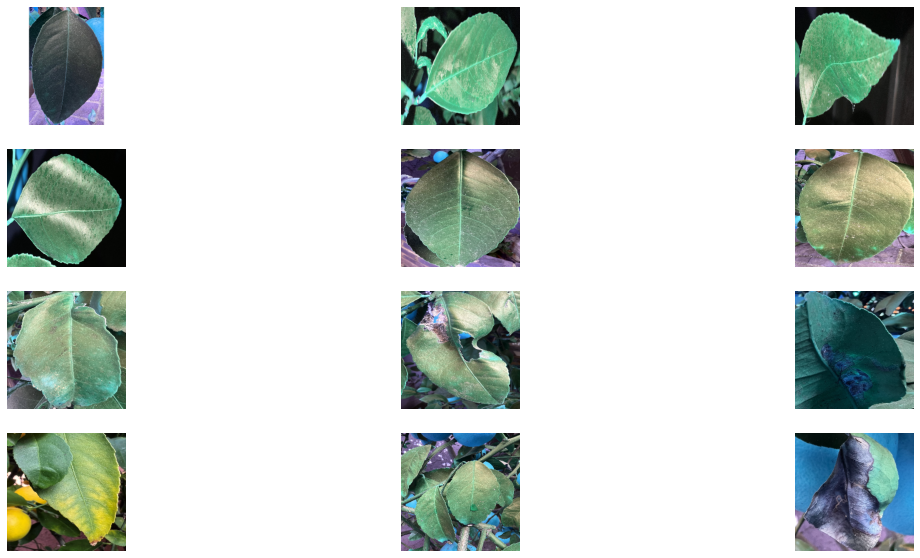

In [26]:
# Display  images
count = len(images_test) - 1

fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(20,10))
for i in range(4):
    for j in range(3):
        #indx = random.randint(0,count)
        axs[i][j].imshow(images_test[i*3+j])
        axs[i][j].axis('off')
plt.show()

In [28]:
print(images_test)
print(image_label_test)

[<tf.Tensor: shape=(256, 256, 3), dtype=float32, numpy=
array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]], dtype=float32)>, <tf.Tensor: shape=(256, 256, 3),

In [31]:
XT = np.array(images_test)
YT = np.array(image_label_test)

#(XT, YT) = utils.shuffle(XT, YT)
test_results = model.evaluate(x=XT, y=YT)
print('\nTest Acc. {:.2f}%'.format(test_results[1]*100))

1/1 [==============================] - 0s 27ms/step - loss: 5.7801 - accuracy: 0.5000

Test Acc. 50.00%


In [32]:
# transform logits to probabilities
pred_logits = model.predict(XT)
probas = tf.sigmoid(pred_logits)
probas = probas.numpy().flatten()*100

1/1 [==============================] - 0s 85ms/step


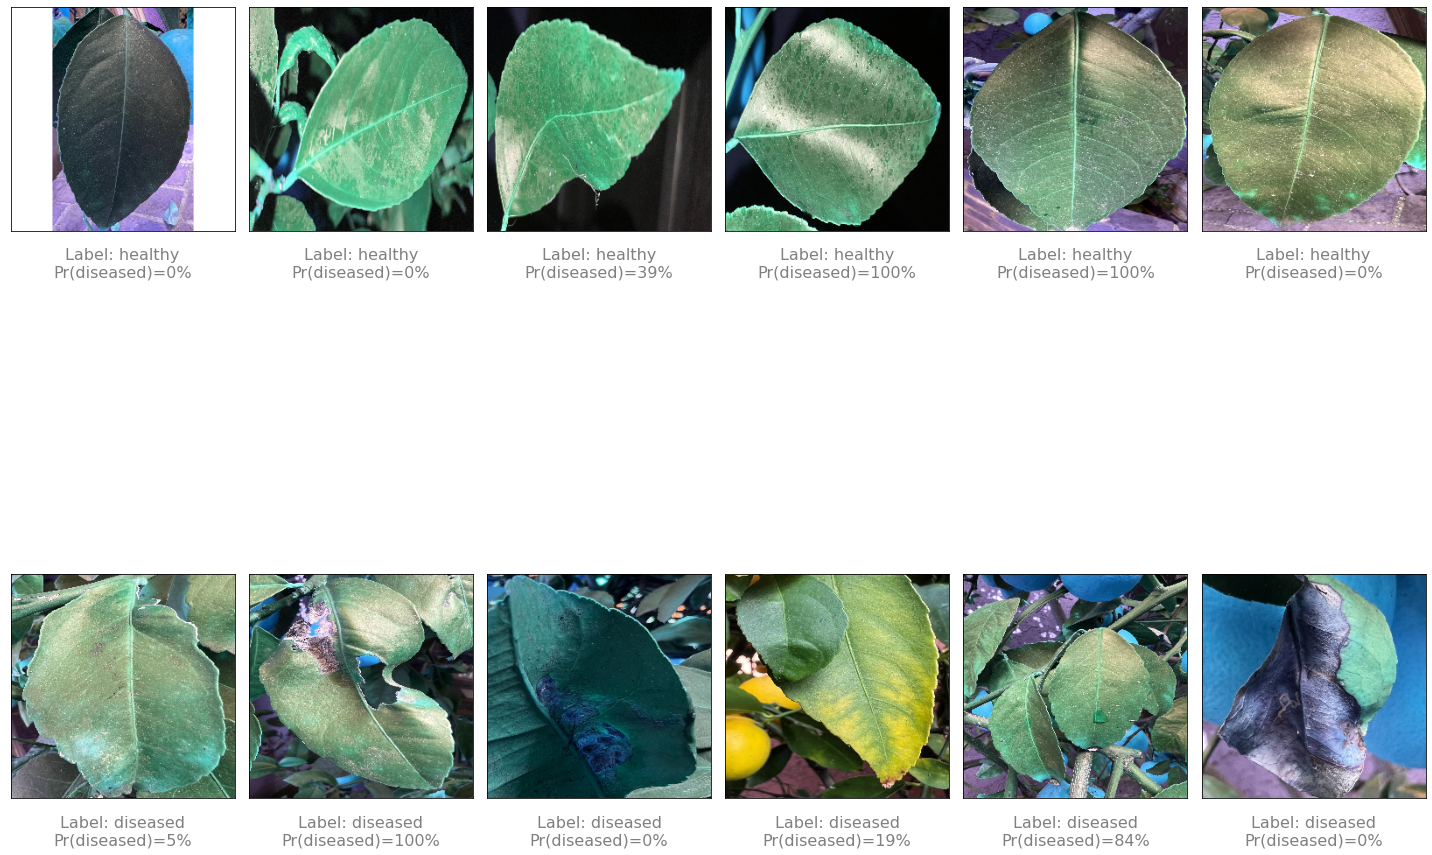

In [35]:
# plot test data and associated prediction
fig = plt.figure(figsize=(20, 20))

for j, example in enumerate(XT[0:12]):
    ax = fig.add_subplot(2,6, j+1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(array_to_img(example))
    if YT[j]==0:
        label='healthy'
    else:
        label='diseased'
    
    ax.text(
        0.5, 
        -0.15, 
        'Label: {:s}\nPr(diseased)={:.0f}%'.format(label, probas[j]), 
        size=16, 
        color='grey',
        horizontalalignment='center',
        verticalalignment='center', 
        transform=ax.transAxes)
    
plt.tight_layout()
plt.show()